# This is a script to shift and combined images for the 16 positions of the rotor of MOPTOP

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60174.979820 from DATE-END'. [astropy.wcs.wcs]


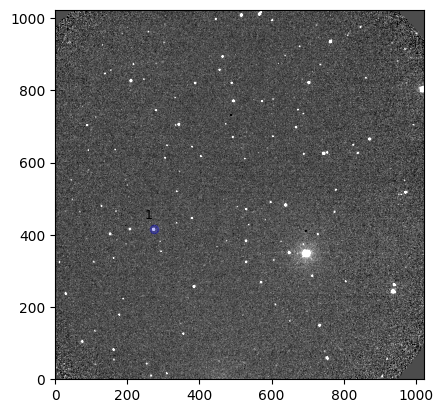

In [2]:
from photometry import Photometry
import os
import pandas as pd
from scripts.tools import sort_files
import matplotlib.pyplot as plt
from copy import copy
import astropy.io.fits as fits
import numpy as np

star_name = "GRB 230818A"
_set = "first"
camera = 3
max_size = 10
src_path = os.path.join(
    "..",
    "Pol charact MOPTOP",
    "Scientific objects",
    star_name,
    f"{_set} set",
    "all data",
)


csv_file = os.path.join(src_path, "..", "setup", f"objects coordinates.csv")
df = pd.read_csv(csv_file)
df = df.loc[df["name"] == "star shifts"]
objects = {
    "name": df["name"],
    "ra": df[f"ra_cam{camera}"],
    "dec": df[f"dec_cam{camera}"],
}

file = os.path.join(src_path, "3_e_20230818_5_1_1_1.fits")
image = fits.getdata(file)
median = np.median(image)
std = np.median(np.abs(image - median))
plt.imshow(
    image, vmax=median + 7 * std, vmin=median - 3 * std, origin="lower", cmap="gray"
)


objects = pd.DataFrame.from_dict(objects)
phot = Photometry(file, objects, max_size)
phot.reset_object_coords()
for idx, _object in enumerate(phot.obj_list):
    x, y = _object.xcoord, _object.ycoord
    plt.plot(x, y, f"bo", alpha=0.25)
    plt.annotate(f"{idx+1}", (x * 0.99, y * 1.05), ha="right", va="bottom", fontsize=9)

plt.show()

In [3]:
coords = {
    "run_num": [],
    "exp_num": [],
    "cam3_x": [],
    "cam3_y": [],
    "cam4_x": [],
    "cam4_y": [],
}

for cam in [3, 4]:
    objects = {
        "name": df["name"],
        "ra": df[f"ra_cam{camera}"],
        "dec": df[f"dec_cam{camera}"],
    }
    objects = pd.DataFrame.from_dict(objects)
    image_list = sort_files(src_path, f"{cam}_e")
    for file in image_list:
        file_path = os.path.join(src_path, file)
        phot = Photometry(file_path, objects, max_size)
        phot.reset_object_coords()

        obj = phot.obj_list[0]
        coords[f"cam{cam}_x"].append(obj.xcoord)
        coords[f"cam{cam}_y"].append(obj.ycoord)
        objects["ra"] = obj.ra
        objects["dec"] = obj.dec

        if cam == 3:
            hdr = fits.getheader(file_path)
            coords["run_num"].append(hdr["RUNNUM"])
            coords["exp_num"].append(hdr["EXPNUM"])


df = pd.DataFrame.from_dict(coords)
csv_file = os.path.join(src_path, "..", "setup", f"coords_over_series.csv")
df.sort_values(by=["run_num"])
df.to_csv(csv_file, index=False)

Set MJD-END to 60174.979878 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.979936 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.979994 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980052 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980110 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980168 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980225 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980283 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980341 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980399 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980457 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980515 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980572 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980630 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980688 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980746 from DATE-END'. [astropy.wcs.wcs]
Set MJD-

# CCD frame after the shift

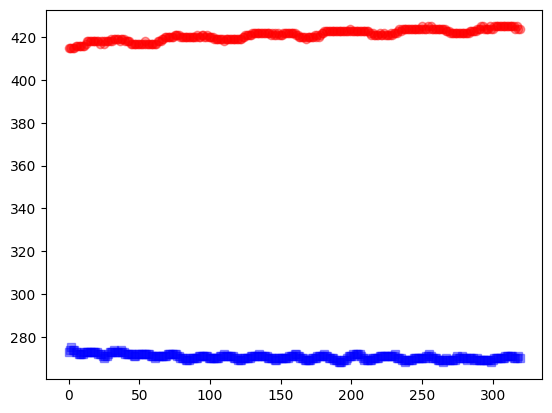

In [4]:
import numpy as np
import matplotlib.patches as patches

file_path = os.path.join(src_path, "..", "setup", f"coords_over_series.csv")
df = pd.read_csv(file_path)
x, y = df["cam3_x"], df["cam3_y"]
fig, ax = plt.subplots()
# plt.ylim(650, 750)
plt.plot(x, "bs", alpha=0.4)
plt.plot(y, "ro", alpha=0.4)
plt.show()

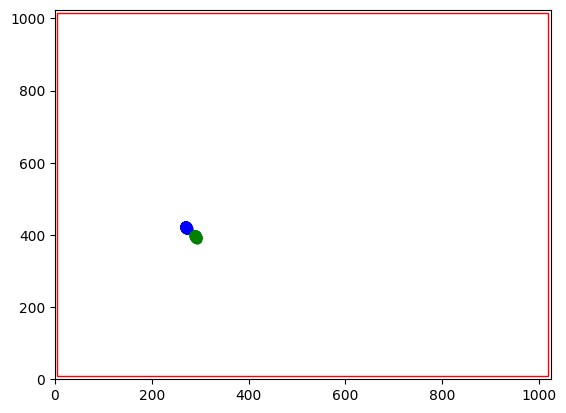

In [5]:
import numpy as np
import matplotlib.patches as patches

file_path = os.path.join(src_path, "..", "setup", f"coords_over_series.csv")
df = pd.read_csv(file_path)
x, y = df["cam3_x"], df["cam3_y"]
max_var_x = np.max(np.abs(x - x[0]))
max_var_y = np.max(np.abs(y - y[0]))

fig, ax = plt.subplots()
rect = patches.Rectangle(
    (max_var_x, max_var_y),
    1024 - 2 * max_var_x,
    1024 - 2 * max_var_y,
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
ax.add_patch(rect)
plt.plot(x, y, "bo", alpha=0.5)
x, y = df["cam4_x"], df["cam4_y"]
plt.plot(x, y, "go", alpha=0.5)
plt.ylim(0, 1024)
plt.xlim(0, 1024)
plt.show()

# Combine images using shifts

In [7]:
from fits_files import FITS_files_manager
import os


ffiles = FITS_files_manager(src_path)
shifts_file = os.path.join(src_path, "..", "setup", f"coords_over_series.csv")
ffiles.shift_images(shifts_file)

In [12]:
dest_path = os.path.join(src_path, "..", star_name)

# ffiles.combine_images_by_run(dest_path)
ffiles.combine_images_by_rotor_position(dest_path, nruns=2)